In [1]:
%matplotlib inline

In [2]:
# from astropy.io import votable as vot
from astroquery.vizier import Vizier
#catalog_list = Vizier.find_catalogs('Kang W51')

#we must set
Vizier.ROW_LIMIT = -1  #needed to bypass the 50 rows limit

#and if we read again...
DaRio2009_table2 = Vizier.get_catalogs('J/ApJS/183/261/table2')



## Read the WFI data

In [3]:
DaRio2009_table2

TableList with 1 tables:
	'0:J/ApJS/183/261/table2' with 17 column(s) and 2621 row(s) 

In [4]:
#...we are good:
DaRio2009_table2.pprint()  #pretty print shows just the size of the database

TableList with 1 tables:
	'0:J/ApJS/183/261/table2' with 17 column(s) and 2621 row(s) 


In [5]:
#to get a manageable table we need to get extension [0]
WFI = DaRio2009_table2[0]
WFI.pprint()

 _RAJ2000  _DEJ2000 n__DRS2009_ __DRS2009_ ... e_TiO   Imag  e_Imag __H97b_
   deg       deg                           ...  mag    mag    mag          
--------- --------- ----------- ---------- ... ------ ------ ------ -------
 83.94588  -5.29914           a          1 ...  0.003  8.626  0.027     992
 83.83629  -5.36233           a          2 ...  0.004  8.822  0.021     660
 83.77167  -5.24731           a          3 ...  0.003  9.280  0.036     260
 83.55900  -5.61503           a          4 ...  0.004  9.425  0.016      --
 83.83879  -5.20353           a          5 ...  0.003  9.538  0.018     670
 83.86837  -5.43892                      6 ...  0.004  9.552  0.016     831
 83.54629  -5.38183           a          7 ...  0.004  9.596  0.018      --
 83.70821  -5.31239           a          8 ...  0.004  9.616  0.023     108
 83.81967  -5.39033           a          9 ...  0.006  9.652  0.019      --
 83.66562  -5.40711           a         10 ...  0.003  9.794  0.021      45
      ...   

### The Ha photometry is in a separate table

In [6]:
DaRio2009_table3 = Vizier.get_catalogs('J/ApJS/183/261/table5')
Ha=DaRio2009_table3[0]
Ha.info()

<Table masked=True length=1040>
   name     dtype    unit  format                                        description                                        
---------- ------- ------- ------ ------------------------------------------------------------------------------------------
  _RAJ2000 float64     deg  %9.5f Right ascension (FK5, Equinox=J2000.0) (computed by VizieR, not part of the original data)
  _DEJ2000 float64     deg  %9.5f     Declination (FK5, Equinox=J2000.0) (computed by VizieR, not part of the original data)
       Seq   int16                                                                             Running identification number
__DRS2009_   int16                                                                     Identification number from table2.dat
   RAJ2000   str11 "h:m:s"                                                                   Hour of Right Ascension (J2000)
   DEJ2000   str11 "d:m:s"                                                                   

/Users/robberto/anaconda/envs/astroconda/lib/python2.7/site-packages/astropy/table/column.py:268: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


In [7]:
haindex = Ha['__DRS2009_']
WFI['Ha']=0
WFI['Ha'][haindex]=Ha['EWA']
#WFI['Ha']

## Read the ISPI photometry

In [8]:
Robberto2010_table5 = Vizier.get_catalogs('J/AJ/139/950/table5')

In [9]:
Robberto2010_table5

TableList with 1 tables:
	'0:J/AJ/139/950/table5' with 27 column(s) and 7759 row(s) 

In [10]:
#to get a manageable table we need to get extension [0]
ISPI=Robberto2010_table5[0]
ISPI.pprint()

 _RAJ2000  _DEJ2000   ID   RAJ2000   DEJ2000  ... e_KAp  Image Exp  St Clone 
   deg       deg             deg       deg    ...  mag          s            
--------- --------- ----- --------- --------- ... ------ ----- --- --- ------
 83.83743  -5.22006     1  83.83743  -5.22006 ...  0.127     1  30   3      0
 83.92990  -5.22361     2  83.92990  -5.22361 ...  0.110     1  30   3      0
 83.83944  -5.22901     3  83.83944  -5.22901 ...  0.435     1  30   3      0
 83.93644  -5.23733     4  83.93644  -5.23733 ...  0.085     1  30   3      0
 83.96639  -5.23799     5  83.96639  -5.23799 ...  0.016     1  30   3      0
 83.96664  -5.23852     6  83.96664  -5.23852 ...  0.035     1  30   3      0
 83.89600  -5.25351     7  83.89600  -5.25351 ...  0.191     1  30   3      0
 83.99811  -5.26343     8  83.99811  -5.26343 ...  0.084     1  30   3      0
 83.97895  -5.27171     9  83.97895  -5.27171 ...  0.056     1  30   3      0
 83.92232  -5.27817    10  83.92232  -5.27817 ...  0.057     1  

## Combine the two catalogs

In [11]:
# For convenience
ISPI_RA=ISPI['_RAJ2000']
ISPI_DE=ISPI['_DEJ2000']
WFI_RA=WFI['_RAJ2000']
WFI_DE=WFI['_DEJ2000']

In [12]:
#From the astropy manual
from astropy.coordinates import ICRS
from astropy import units as u

#assume ra1/dec1 and ra/dec2 are arrays loaded from some file
c_ISPI = ICRS(ISPI_RA, ISPI_DE, unit=(u.degree, u.degree))
c_WFI = ICRS(WFI_RA, WFI_DE, unit=(u.degree, u.degree))
idx, d2d, d3d = c_WFI.match_to_catalog_sky(c_ISPI)

/Users/robberto/anaconda/envs/astroconda/lib/python2.7/site-packages/astropy/coordinates/angles.py:672: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/robberto/anaconda/envs/astroconda/lib/python2.7/site-packages/astropy/coordinates/angles.py:672: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/robberto/anaconda/envs/astroconda/lib/python2.7/site-packages/astropy/coordinates/angles.py:563: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/robberto/anaconda/envs/astroconda/lib/python2.7/site-packages/astropy/coordinates/angles.py:563: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):


In [13]:
#we have 2621 sources detected by WFI.
len(c_WFI)

2621

In [14]:
#the corresponding indices in the ISPI catalog (much larger) are give by the vector idx.
#We select the rows/sources corresponding to these indices
ISPI_matches = c_ISPI[idx]
#dra = (ISPI_matches.ra - c_WFI.ra).arcmin
#ddec = (ISPI_matches.dec - c_WFI.dec).arcmin

In [15]:
#The matching is agnostic about the minimum distance, some are bad. 
#We need to keep the good ones, selecting a discrepancy in coordinates of <1"
matched = d2d.arcsec < 1  #This is an array of 2621 TRUe/FALSE values
#these are the indices of the ISPI sources really matching the WFI catalog
m=idx[matched == True]

#v=list(range(len(c_WFI)))
#v
#v=v[matched == True]

In [16]:
#len(matched)
print(len(m))  #we pass from 2621 to 2426 paired sources
#print(m)

2426


In [1]:
ISPI=ISPI[m] #The new ISPI table is extracted with the indices of the good matches 
WFI=(WFI[matched]) #same for the WFI table

NameError: name 'ISPI' is not defined

## Create the table with the combined photometry

In [18]:
#This may be needed to get the right keywords
WFI.info()

<Table masked=True length=2426>
    name     dtype    unit  format                                               description                                                n_bad
----------- ------- ------- ------ -------------------------------------------------------------------------------------------------------- -----
   _RAJ2000 float64     deg  %9.5f               Right ascension (FK5, Equinox=J2000.0) (computed by VizieR, not part of the original data)     0
   _DEJ2000 float64     deg  %9.5f                   Declination (FK5, Equinox=J2000.0) (computed by VizieR, not part of the original data)     0
n__DRS2009_    str1                                     {\bf M} indicates M-type stars (table 4) and {\bf a} H{alpha} measurements (table5)     0
 __DRS2009_   int16                                                                                                   Identification number     0
    RAJ2000   str11 "h:m:s"                                                                 

/Users/robberto/anaconda/envs/astroconda/lib/python2.7/site-packages/astropy/table/info.py:94: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if np.all(info[name] == ''):


In [19]:
photometry=WFI['__DRS2009_','Umag','e_Umag','Bmag','e_Bmag','Vmag','e_Vmag','TiO','e_TiO','Ha','Imag','e_Imag']

In [20]:
#and to get the info for ISPI
#ISPI.info()

In [21]:
#add the ISPI measures to the final photometry table
photometry['Jmag']=ISPI['Jmag']
photometry['Hmag']=ISPI['Hmag']
photometry['Kmag']=ISPI['Kmag']
photometry['e_Jmag']=ISPI['e_Jmag']
photometry['e_Hmag']=ISPI['e_Hmag']
photometry['e_Kmag']=ISPI['e_Kmag']

#check
photometry



__DRS2009_,Umag,e_Umag,Bmag,e_Bmag,Vmag,e_Vmag,TiO,e_TiO,Ha,Imag,e_Imag,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag
,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,mag,mag
int16,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32
1,--,--,16.093,0.004,13.728,0.004,12.097,0.003,0,8.626,0.027,6.143,4.778,4.493,0.020,0.020,0.270
2,9.886,0.008,10.041,0.009,9.736,0.008,9.540,0.004,5,8.822,0.021,8.067,7.604,7.380,0.026,0.034,0.023
3,13.260,0.007,12.141,0.011,11.246,0.017,10.535,0.003,24,9.280,0.036,8.166,7.539,7.190,0.029,0.044,0.021
4,11.081,0.005,10.697,0.009,10.219,0.010,9.929,0.004,-2,9.425,0.016,8.993,8.628,8.279,0.026,0.071,0.027
5,13.057,0.004,12.043,0.052,11.225,0.015,10.646,0.003,7,9.538,0.018,8.645,8.064,7.879,0.026,0.053,0.031
6,--,--,--,--,--,--,9.601,0.004,2,9.552,0.016,9.386,9.323,9.315,0.023,0.032,0.019
7,11.199,0.014,10.900,0.008,10.388,0.010,10.130,0.004,0,9.596,0.018,9.117,8.905,8.792,0.026,0.032,0.019
8,12.583,0.004,11.496,0.010,10.928,0.010,10.474,0.004,11,9.616,0.023,8.776,7.997,7.303,0.023,0.038,0.021


### Write the table

In [22]:
photometry.write('/Users/robberto/Box Sync/Orion/catalogs/Table WFI+ISPI.txt',format='ascii')

In [23]:
#and if you need to read it, you can use the Table environment of astropy
from astropy.table import Table
table=Table.read('/Users/robberto/Box Sync/Orion/catalogs/Table WFI+ISPI.txt',format='ascii')
table

__DRS2009_,Umag,e_Umag,Bmag,e_Bmag,Vmag,e_Vmag,TiO,e_TiO,Ha,Imag,e_Imag,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag
int64,str6,str5,str6,str5,str6,str5,str6,str5,int64,float64,float64,str7,str6,str6,str6,str5,str5
1,--,--,16.093,0.004,13.728,0.004,12.097,0.003,0,8.626,0.027,6.143,4.778,4.493,0.020,0.020,0.270
2,9.886,0.008,10.041,0.009,9.736,0.008,9.540,0.004,5,8.822,0.021,8.067,7.604,7.380,0.026,0.034,0.023
3,13.260,0.007,12.141,0.011,11.246,0.017,10.535,0.003,24,9.28,0.036,8.166,7.539,7.190,0.029,0.044,0.021
4,11.081,0.005,10.697,0.009,10.219,0.010,9.929,0.004,-2,9.425,0.016,8.993,8.628,8.279,0.026,0.071,0.027
5,13.057,0.004,12.043,0.052,11.225,0.015,10.646,0.003,7,9.538,0.018,8.645,8.064,7.879,0.026,0.053,0.031
6,--,--,--,--,--,--,9.601,0.004,2,9.552,0.016,9.386,9.323,9.315,0.023,0.032,0.019
7,11.199,0.014,10.900,0.008,10.388,0.010,10.130,0.004,0,9.596,0.018,9.117,8.905,8.792,0.026,0.032,0.019
8,12.583,0.004,11.496,0.010,10.928,0.010,10.474,0.004,11,9.616,0.023,8.776,7.997,7.303,0.023,0.038,0.021
9,9.928,0.021,10.075,0.026,10.122,0.012,9.908,0.006,18,9.652,0.019,8.680,8.500,8.380,0.110,0.010,0.110


### Inspect a source

In [24]:
import numpy as np
wl=np.array([0.35, 0.45, 0.55, 0.62, 0.658, 0.775, 1.2, 1.65, 2.2])
wl

array([ 0.35 ,  0.45 ,  0.55 ,  0.62 ,  0.658,  0.775,  1.2  ,  1.65 ,  2.2  ])

In [25]:
mags=photometry['Umag','Bmag','Vmag','TiO','Ha','Imag','Jmag','Hmag','Kmag']#[1]
star=mags[:][1]
print(star)

 Umag   Bmag   Vmag   TiO    Ha  Imag   Jmag   Hmag   Kmag 
 mag    mag    mag    mag        mag    mag    mag    mag  
------ ------ ------ ------ --- ------ ------ ------ ------
 9.886 10.041  9.736  9.540   5  8.822  8.067  7.604  7.380


In [26]:
import pandas as pd
photom=pd.read_csv('/Users/robberto/Box Sync/Orion/catalogs/Table WFI+ISPI.txt',delim_whitespace=True)
star=photom[['Umag','Bmag','Vmag','TiO','Ha','Imag','Jmag','Hmag','Kmag']]
star=star[1:2]
star=np.asarray(star,dtype=float)
star=np.squeeze(star)
star

array([  9.886,  10.041,   9.736,   9.54 ,   5.   ,   8.822,   8.067,
         7.604,   7.38 ])

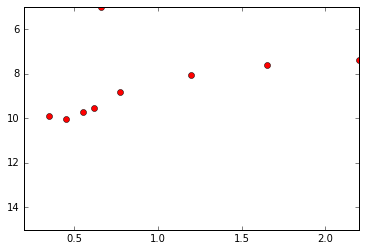

In [27]:
import matplotlib.pyplot as plt
plt.plot(wl, star , 'ro')
plt.axis([0.2, 2.2,15, 5])
plt.show()